# HOMEWORK 8

In this homework you are going to implement your first machine learning algorithm to automatically binarize document images. The goal of document binarization is to seprate the characters (letters) from everything else. This is the crucial part for automatic document understanding and information extraction from the . In order to do so, you will use the Otsu thresholding algorithm.

At the end of this notebook, there are a couple of questions for you to answer.

In [60]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Let's load the document image we will be working on in this homework.

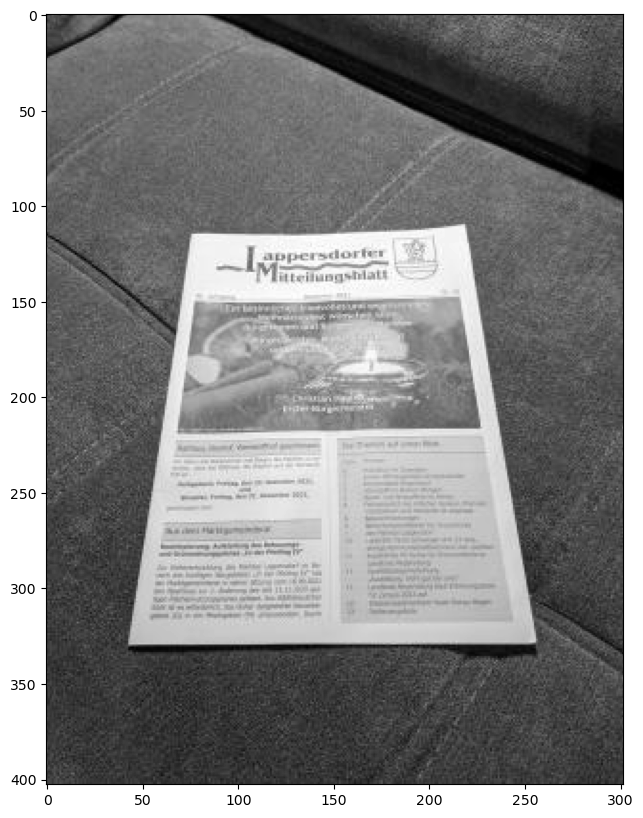

In [63]:
img = cv2.imread('/Users/Roman Zubrytskyi/Downloads/document.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

First, let's have a look at the histogram.

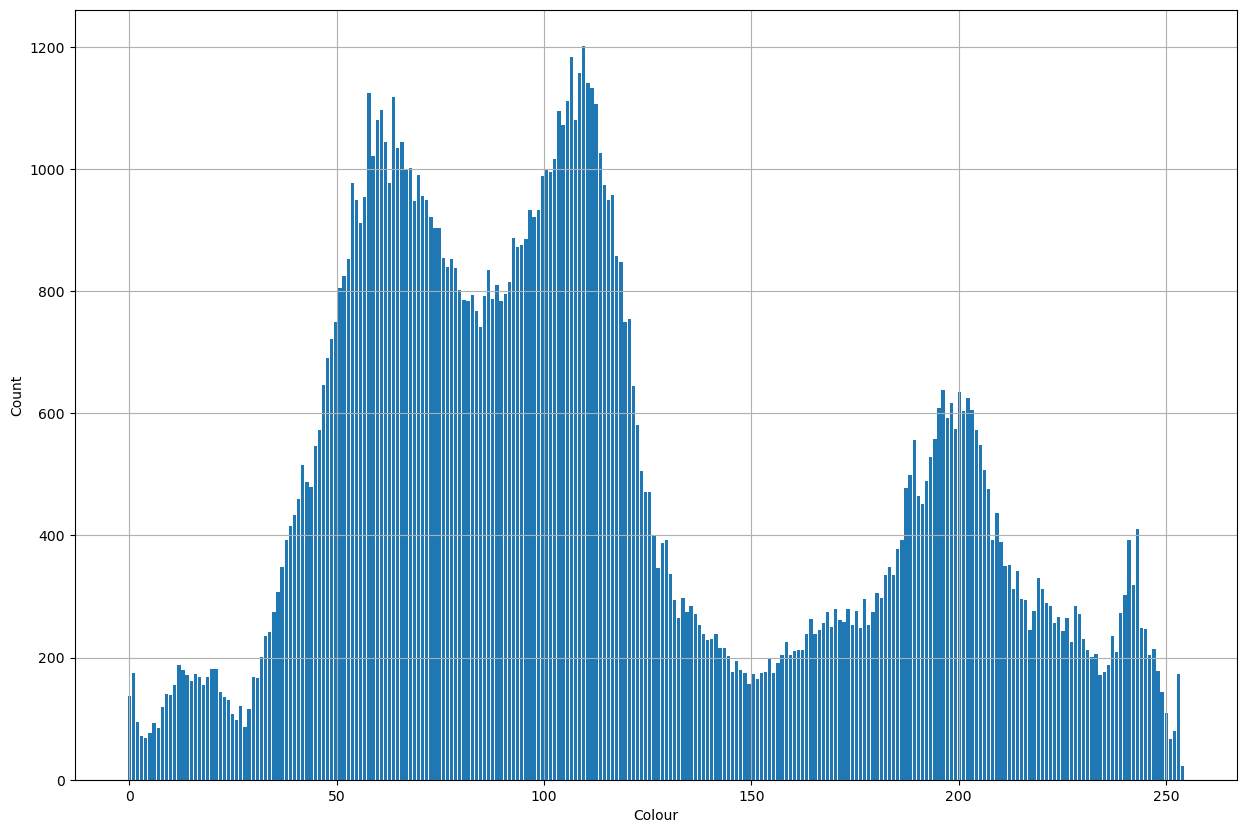

<Figure size 1500x1000 with 0 Axes>

In [66]:
h = np.histogram(img, 256)
plt.bar(h[1][0:-1], h[0])
plt.xlabel('Colour'), plt.ylabel('Count')
plt.grid(True)
plt.show()
plt.savefig('/Users/Roman Zubrytskyi/histogram.png', dpi=300)

### Otsu Thresholding

Let's now implement the Otsu thresholding algorithm. Remember that the algorithm consists of an optimization process that finds the thresholds that minimizes the intra-class variance or, equivalently, maximizes the inter-class variance.

In this homework, you are going to demonstrate the working principle of the Otsu algorithm. Therefore, you won't have to worry about an efficient implementation, we are going to use the brute force approach here.

In [69]:
# Total number of pixels
num_pixels = img.size

# Initializations
best_wcv = 1e6  
opt_th = None  

# Probability distribution of pixel intensities
pixel_prob = h[0] / num_pixels

# Brute force search using all possible thresholds (levels of gray)
for th in range(0, 256):
    # Class weights (omega parameters)
    omega_f = np.sum(pixel_prob[th:])  # Weight of the foreground
    omega_b = np.sum(pixel_prob[:th])  # Weight of the background
    
    if omega_f == 0 or omega_b == 0:
        continue

    # Mean values for foreground and background
    mean_f = np.sum(np.arange(th, 256) * pixel_prob[th:]) / omega_f
    mean_b = np.sum(np.arange(0, th) * pixel_prob[:th]) / omega_b

    # Variances for foreground and background
    sigma2_f = np.sum(((np.arange(th, 256) - mean_f) ** 2) * pixel_prob[th:]) / omega_f
    sigma2_b = np.sum(((np.arange(0, th) - mean_b) ** 2) * pixel_prob[:th]) / omega_b

    # Within-class variance
    wcv = omega_f * sigma2_f + omega_b * sigma2_b

    # Optimization: keep the threshold with the lowest within-class variance
    if wcv < best_wcv:
        best_wcv = wcv
        opt_th = th

# Print out the optimal threshold found by Otsu algorithm
print('Optimal threshold:', opt_th)

Optimal threshold: 140


Finally, let's compare the original image and its thresholded representation.

(<Axes: >, <matplotlib.image.AxesImage at 0x30b842270>)

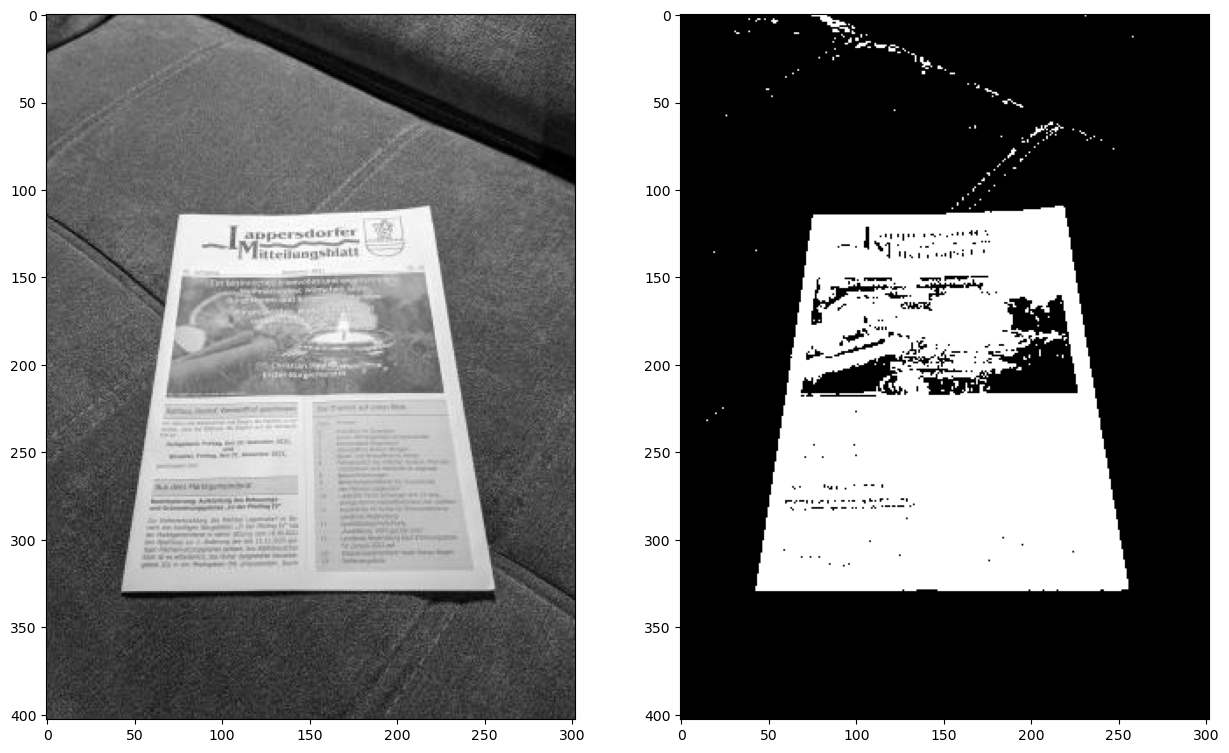

In [104]:
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(img > opt_th, cmap='gray')

### Questions

* Looking at the computed histogram, could it be considered bimodal?
* Looking at the computed histogram, what binarization threshold would you chose? Why?
* Looking at the resulting (thresholded) image, is the text binarization (detection) good?

* Yes, it is bimodal, because we have two distinct peaks, one for background and one for foreground.
* I would choose a threshold around 150 as it is the lowest point between two peaks.
* On our result text binarization is poorly implemented, we would consider increasing the threshold.